WOMEN TECHSTERS FELLOWSHIP (CLASS OF 2024)

MONTH 5 PROJECT - DEEP LEARNING PROJECT

DATA SCIENCE AND ARTIFICIAL INTELLIGENCE GROUP C

OPEYEMI AWE



As  Machine/Deep Learning Engineers, We are embarking on an exciting project in the realm of Deep Learning. Our objective is to deploy one of the two deep learning algorithms covered: Artificial Neural Netwroks(ANN) OR Convolutional Neural Networks(CNN). Given our expertise, we have chosen to delve into a Convolutional Neural Networks (CNN) focusing on face mask detection dataset.

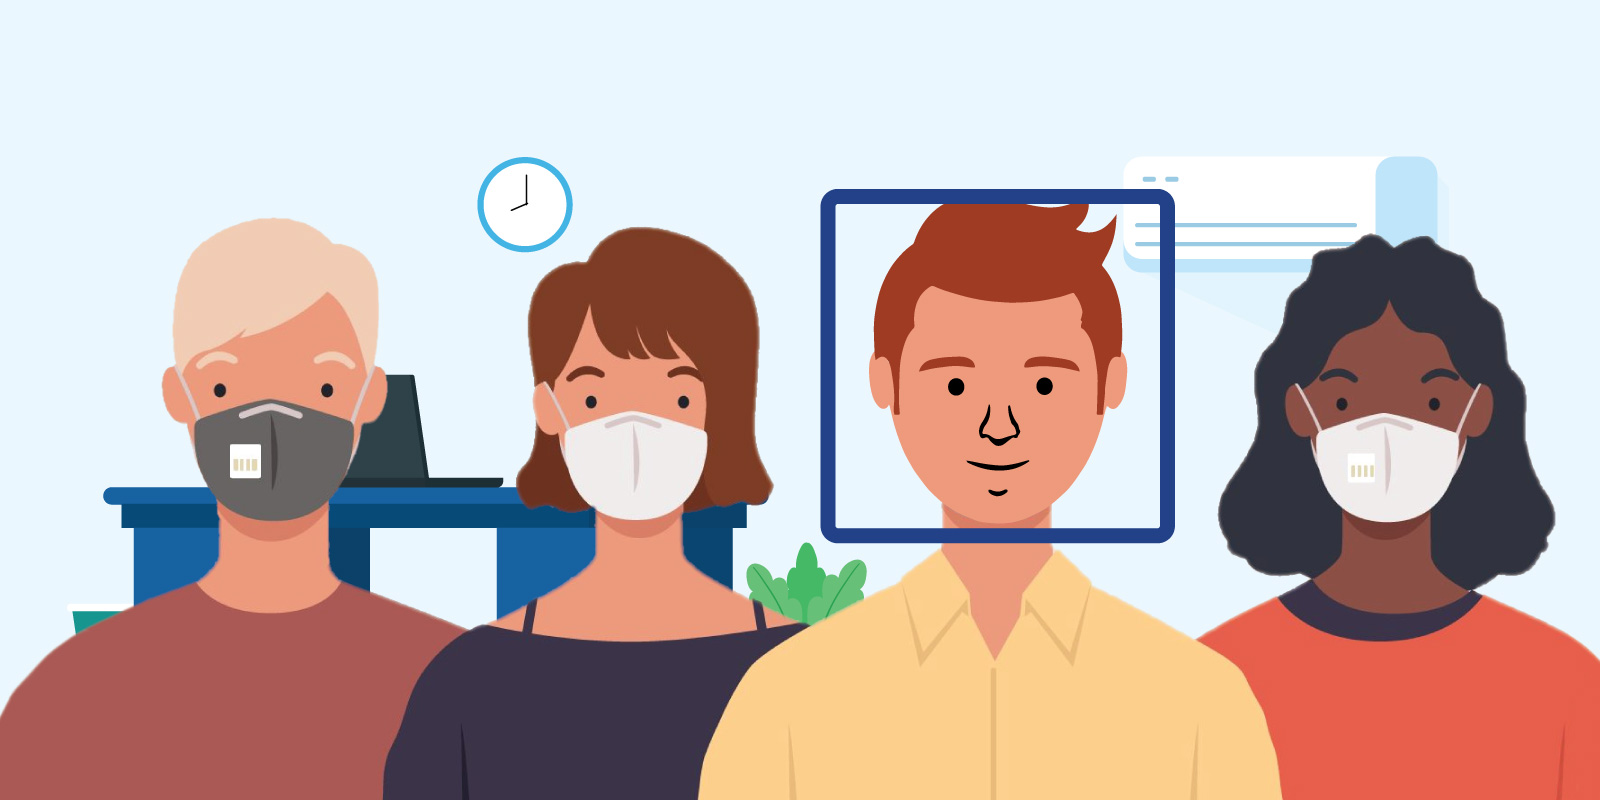

##*Problem Statement:*

In recent times, the use of face masks has become crucial for preventing the spread of infectious diseases, particularly during pandemics. However, monitoring and ensuring compliance with mask-wearing guidelines can be challenging, especially in crowded public spaces. To address this issue, this project aims to develop a deep learning-based system for automatic face mask detection in images.

##*Objective:*
The primary objective of this project is to create a robust and efficient deep learning model that can accurately detect whether a person in an image or video is wearing a face mask. The model should be able to handle various scenarios, such as different mask types, diverse facial expressions, and varying lighting conditions.

##*Proposed Solution:*
The proposed solution involves using convolutional neural networks (CNNs), a class of deep learning models well-suited for image classification tasks. The model will be trained on a dataset of labeled images containing people with and without masks.

##*Project Workflow*

Data Collection

Image Processing

Train Test Split

Convolutional Neural Network (CNN)

Model Evaluation



Here is the project link:

Dataset Link: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data

Google Colab:  https://colab.research.google.com/drive/1YF_Cd9N7CPrTZblbCERz9nb5e2WS0-MB?usp=sharing

Sample Image google drive link: https://drive.google.com/drive/folders/1rnjH8c29z6Tfs7_BU3b08JfuiHf6ByH_?usp=sharing



##*About the Dataset*

The Dataset contains a large dataset of images containing people with and without face masks. it consists of 7553 RGB images in 2 folders as with_mask and without_mask. Images of faces with mask are 3725 and images of faces without mask are 3828. The images will be required for training and evaluating the model. The dataset will serve as a diverse and representative of real-world scenarios to ensure the model's generalization ability.

Install kaggle on the google colab

In [ ]:
#Installing kaggle
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

To import the face mask dataset from Kaggle, we followed these steps:

1. Go to the dataset on Kaggle: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data

2. Copy the API Command provided on the dataset page.

3. Create a new API Token on Kaggle if you haven't already. The token file will be downloaded to your desktop.

4. Upload the Kaggle API token file from your desktop to the notebook environment you are using (e.g., Google Colab, Jupyter Notebook).

5. In your notebook, use the following command to download the dataset:    

!kaggle datasets download -d omkargurav/face-mask-dataset

Note: Ensure there is an exclamation mark (!) before running the Kaggle API command.

6. After downloading, unzip the dataset to extract the files for further processing.




In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:01<00:00, 121MB/s]
100% 163M/163M [00:01<00:00, 119MB/s]


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Note: After extraction, we have a new folder named "data." This folder contains two subfolders: "with_mask" and "without_mask," each containing images of people either wearing or not wearing face masks, respectively.

In [ ]:
!ls

 data			'Sample 4.jpeg'       'Sample test 3.jpeg'  'Test 1.jpeg'
 face-mask-dataset.zip	 sample_data	      'sample test 4.jpeg'  'Test 2.jpeg'
 kaggle.json		'sample test 2.jpeg'  'sample test 6.jpeg'


Importing the necessary libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Analysing the dataset present in the data folder
#reading the with_mask list
with_mask_files = os.listdir('/content/data/with_mask')
#Checking the first 5 and last 5 images
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1641.jpg', 'with_mask_57.jpg', 'with_mask_752.jpg', 'with_mask_1577.jpg', 'with_mask_154.jpg']
['with_mask_1541.jpg', 'with_mask_2659.jpg', 'with_mask_1444.jpg', 'with_mask_3007.jpg', 'with_mask_2217.jpg']


In [ ]:
# Analysing the dataset present in the data folder
#reading the without_mask list
without_mask_files = os.listdir('/content/data/without_mask')
#Checking the first 5 and last 5 images
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3020.jpg', 'without_mask_68.jpg', 'without_mask_19.jpg', 'without_mask_1458.jpg', 'without_mask_3135.jpg']
['without_mask_3278.jpg', 'without_mask_1471.jpg', 'without_mask_298.jpg', 'without_mask_2696.jpg', 'without_mask_574.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


The dataset is balanced


### *Label Encoding*

Create a label for the two class of images

with mask ----> 1

without mask ----> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
#Checking the first 5 in list for with mask images
print(with_mask_labels[0:5])

#Checking the first 5 list in for with mask images
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
#confirm the length of the images
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:

#creating newlist for the label
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## *Image Preprocessing*

Displaying the images

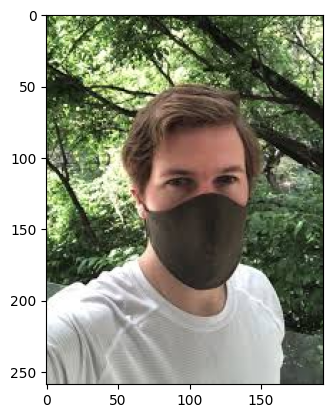

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2831.jpg')
imgplot = plt.imshow(img)
plt.show()

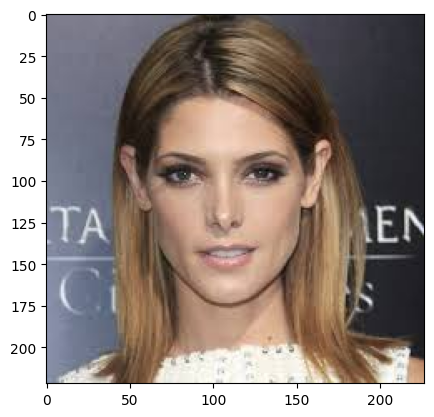

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3095.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing



1.   Resize the images
2.   convert the images to numpy arrays



In [ ]:
# convert the images to numpy arrays,

with_mask_path = '/content/data/with_mask/'    #specify folder path where images are saved

data = []      # create an empty list

for img_file in with_mask_files:       # iterate over the images of people wearing mask

  image = Image.open(with_mask_path + img_file)    # read image
  image = image.resize((128,128))      # resize the size of images
  image = image.convert('RGB')          # convert all images to RGB format
  image = np.array(image)               # convert to numpy arrays
  data.append(image)                    # append processed image into data list


# repeat the above process to images of people without mask
without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# check the datatype of data
type(data)

list

In [ ]:
# check the count of processed images stored in data list
len(data)

7553

array([[[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       ...,

       [[ 65,  83,  89],
        [ 65,  83,  88],
        [ 65,  83,  88],
        ...,
        [115,  32,  48],
        [116,  32,  48],
        [116,  31,  48]],

       [[ 50,  67,  77],
        [ 50,  67,  77],
        [ 50,  67,  77],
        ...,
        [116,  33,  49],
        [117,  32,  49],
        [119,  31,  48]],

       [[ 34,  49,  64],
        [ 34,  49,  64],
        [ 34,  49,  63],
        ...,
        [116,  30,  47],
        [117,  30,  47],
        [118,  31,  48]]], dtype=uint8)
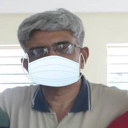

In [ ]:
# check the 1st numpy array in the data list
data[0]

In [ ]:
# check the datatype
type(data[0])

numpy.ndarray

In [ ]:
# check the shape
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list(data list) and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
# split the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data to lie between 0 and 1

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[236, 237, 239],
        [237, 238, 240],
        [237, 238, 240],
        ...,
        [239, 240, 242],
        [239, 240, 242],
        [238, 239, 241]],

       [[236, 237, 239],
        [237, 238, 240],
        [237, 238, 240],
        ...,
        [239, 240, 242],
        [239, 240, 242],
        [238, 239, 241]],

       [[236, 237, 239],
        [237, 238, 240],
        [237, 238, 240],
        ...,
        [239, 240, 242],
        [239, 240, 242],
        [238, 239, 241]],

       ...,

       [[158, 177, 199],
        [151, 169, 195],
        [137, 155, 185],
        ...,
        [ 81,  98, 134],
        [ 80,  97, 133],
        [ 79,  94, 132]],

       [[149, 175, 199],
        [140, 163, 192],
        [128, 150, 183],
        ...,
        [ 78,  93, 129],
        [ 77,  93, 129],
        [ 80,  96, 133]],

       [[139, 160, 189],
        [134, 156, 186],
        [124, 146, 179],
        ...,
        [ 74,  90, 124],
        [ 74,  89, 124],
        [ 71,  87, 123]]], dtype=uint8)
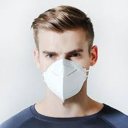

In [ ]:
# before scaling
X_train[0]

In [ ]:
# after scaling
X_train_scaled[0]

array([[[0.9254902 , 0.92941176, 0.9372549 ],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.94901961],
        [0.9372549 , 0.94117647, 0.94901961],
        [0.93333333, 0.9372549 , 0.94509804]],

       [[0.9254902 , 0.92941176, 0.9372549 ],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.94901961],
        [0.9372549 , 0.94117647, 0.94901961],
        [0.93333333, 0.9372549 , 0.94509804]],

       [[0.9254902 , 0.92941176, 0.9372549 ],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.94901961],
        [0.9372549 , 0.94117647, 0.94901961],
        [0.93333333, 0.9372549 , 0.94509804]],

       ...,

       [[0.61960784, 0.69411765, 0.78039216],
        [0.59215686, 0.6627451 , 0.76470588],
        [0.5372549 , 0

# Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
# Initialise the model
model = keras.Sequential()

# convolutional layers
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(keras.layers.Flatten())

# Hidden layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 146s 844ms/step - loss: 0.4390 - accuracy: 0.7984 - val_loss: 0.3214 - val_accuracy: 0.8694
Epoch 2/10
170/170 [==============================] - 151s 886ms/step - loss: 0.2847 - accuracy: 0.8873 - val_loss: 0.2845 - val_accuracy: 0.8860
Epoch 3/10
170/170 [==============================] - 140s 823ms/step - loss: 0.2371 - accuracy: 0.9095 - val_loss: 0.2106 - val_accuracy: 0.9140
Epoch 4/10
170/170 [==============================] - 138s 810ms/step - loss: 0.2027 - accuracy: 0.9200 - val_loss: 0.1928 - val_accuracy: 0.9207
Epoch 5/10
170/170 [==============================] - 130s 768ms/step - loss: 0.1672 - accuracy: 0.9347 - val_loss: 0.1922 - val_accuracy: 0.9256
Epoch 6/10
170/170 [==============================] - 133s 782ms/step - loss: 0.1479 - accuracy: 0.9410 - val_loss: 0.2034 - val_accuracy: 0.9273
Epoch 7/10
170/170 [==============================] - 131s 770ms/step - loss: 0.1239 - accuracy: 0.9557 - val_loss: 0.1984 -

# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 198ms/step - loss: 0.2566 - accuracy: 0.9457
Test Accuracy = 0.9457312822341919


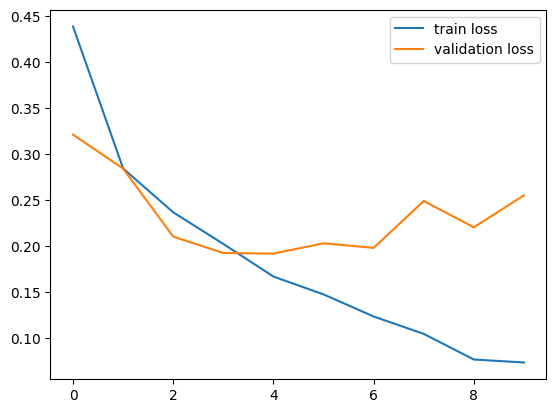

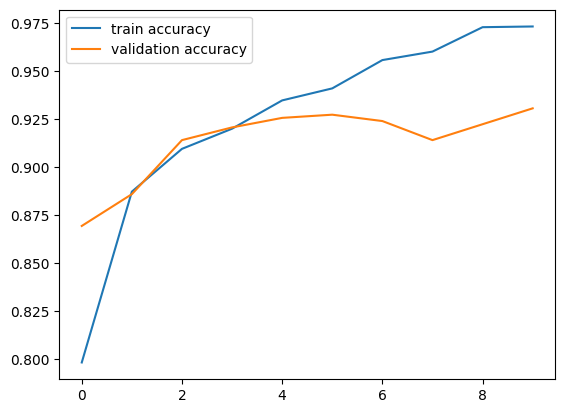

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of the image to be predicted: /content/Sample 4.jpeg


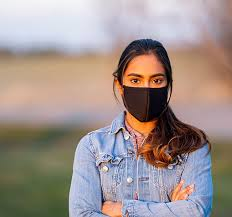

1/1 [==============================] - 0s 190ms/step
[[0.27415058 0.9258106 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/Test 2.jpeg


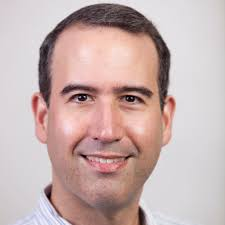

1/1 [==============================] - 0s 33ms/step
[[0.21886301 0.8761364 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

# Conclusion
We are able to build a face mask detection model with an accuracy of 96.16% during training and test accuracy of 92.18%. To improve user experience, we defined a function which takes filepath of image to be detected and returns an output that is interpreted as a person wearing a facemask or not based on the output of model prediction.

# Insights:


1. The project has demonstrated the effectiveness of deep learning, particularly convolutional neural networks, in detecting whether a person is wearing a face mask or not. This showcases the capability of AI technologies in solving real-world problems.

2. By accurately detecting face masks, these model can contribute to public health efforts by monitoring compliance with mask-wearing guidelines in public spaces which can help in preventing the spread of infectious diseases, particularly during pandemics.




# Further Work

1. The function can be improved to extract images from a video clip and realtime videos and make predictions on seen images.

2. The project opens up possibilities for future improvements and applications, such as integrating the model into surveillance systems for automated monitoring of mask-wearing compliance or enhancing the model's performance with additional data and advanced techniques.

#THANKYOU